In [1]:
# project: p2
#https://www.codegrepper.com/code-examples/python/list+in+python+to+dictionary+with+frequency
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import loans
import csv
import search
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fhb = loans.Bank("First Home Bank")

In [4]:
#q1
total=0
loantotal=0
for loan in fhb:
    if loan.interest_rate < 0:
        continue 
    else:
        total+=loan.interest_rate
        loantotal+=1
average=total/loantotal
average   

2.962962962962963

In [5]:
#q2
applicant_total=0
lentotal=0
for loan in fhb:
    applicant_total+=len(loan.applicants)
 
float(applicant_total)/len(fhb)

1.5777777777777777

In [6]:
#q3
ageDict = {}
ageList = list()

for age in fhb:
    ageList.append(age.values["co-applicant_age"])
    ageList.append(age.values["applicant_age"])

#ageList
for item in ageList: 
        if item == "9999":
            continue
        elif (item in ageDict): 
            ageDict[item] += 1
        else: 
            ageDict[item] = 1

dict(sorted(ageDict.items(), key=lambda item: item[1], reverse=True))

{'65-74': 21, '45-54': 21, '35-44': 13, '55-64': 7, '>74': 5, '25-34': 4}

In [7]:
#tree
tree=search.BST()
for i in fhb.loans:
    tree.add(i.interest_rate,i)

In [8]:
#q4
len(tree.__getitem__(-1))

18

In [9]:
#q5
def treeheight(root):
    if root == None:
        return 0

    rightH=treeheight(root.right)
    leftH=treeheight(root.left)
    
    return 1+max(rightH,leftH)
treeheight(tree.root)

9

In [10]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

Text(0, 0.5, 'Total Elasped Milliseconds')

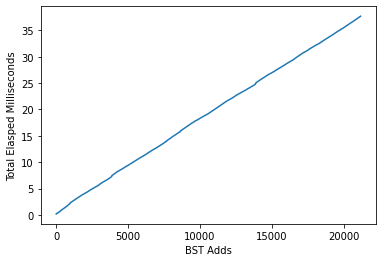

In [11]:
#q6
uwtree=search.BST()
amount=0
df= pd.DataFrame(columns = ['Total Elasped Milliseconds', 'BST Adds'])

first=time.time()
#.t
timelist=[]
amountlist=[]
for i in uwcu.loans:
    uwtree.add(i.interest_rate,i)
    
    amount+=1
    times =  time.time()
  
    
    diff=times-first
    timelist.append(diff*1000)
    amountlist.append(amount)
    
    
df["Total Elasped Milliseconds"]=timelist
df["BST Adds"]=amountlist
plot=df.plot.line(x='BST Adds', y='Total Elasped Milliseconds',  legend=None)
plot.set_ylabel('Total Elasped Milliseconds')

Text(0.5, 0, '')

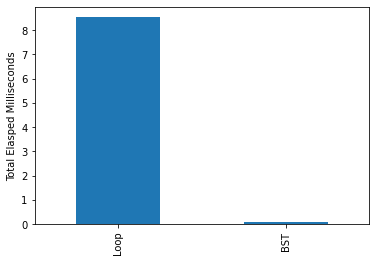

In [12]:
#q7
miss_IR=0
timeb=time.time()
for loan in uwcu.loans:
    if loan.interest_rate == -1:
        miss_IR+=1
timea=time.time()

Loop=(timea-timeb)*1000

timeb1=time.time()
len(uwtree[-1])
timea1=time.time()
BST=(timea1-timeb1)*1000
df= pd.DataFrame({'type':['Loop','BST'],'time':[Loop,BST]})

ll=df.plot.bar(x='type',legend=None)
ll.set_ylabel('Total Elasped Milliseconds')

ll.set_xlabel('')

Text(0.5, 0, 'value')

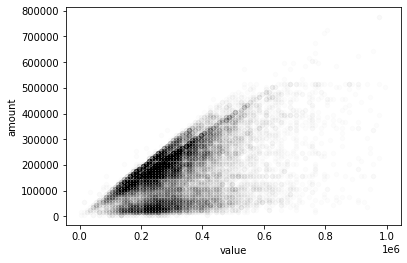

In [13]:
#q8
PV_list=[]
LA_list=[]
for i in range(len(uwcu.loans)):
    PV=uwcu.loans[i].property_value
    LA=uwcu.loans[i].loan_amount
    if PV > 1000000 or PV ==-1:
        continue
    else:
        PV_list.append(PV)
        LA_list.append(LA)


df= pd.DataFrame(columns=['PV', 'LA'])
df[PV]=PV_list
df[LA]=LA_list
ax1 = df.plot.scatter(alpha=0.01, x=PV, y=LA, c='Black')
ax1.set_ylabel('amount')
ax1.set_xlabel('value')  


    #interest_rate=loan_des.interest_rate
    #if interest_rate==-1:
     #   continue
    
#uwcu.loans[i].property_value

<AxesSubplot:xlabel='race'>

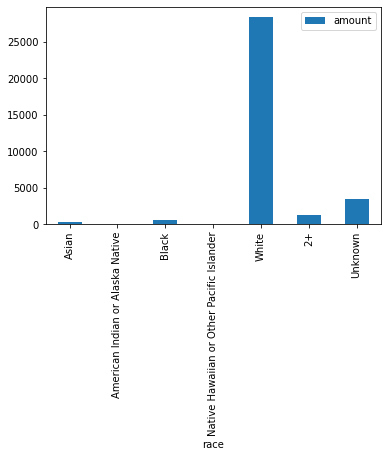

In [14]:
#q9
unknown=0
twoplus=0
black=0
asian=0
white=0
native=0
hawaiian=0 
#not under the five races
nn=0
for loan in uwcu:
    for applicant in loan.applicants:
        if len(applicant.race) == 0:
            unknown+=1
        elif len(applicant.race) > 1:
            twoplus+=1
            continue
        elif 'Asian' in applicant.race:
            asian+=1
            continue
        elif 'Native Hawaiian or Other Pacific Islander' in applicant.race:
            hawaiian+=1
            continue
        elif 'American Indian or Alaska Native' in applicant.race:
            native+=1
            continue
        elif 'Black or African American' in applicant.race:
            black+=1
            continue
        elif 'White' in applicant.race:
            white+=1
            continue
        else:
            nn+=1
race1={'Asian':asian, 'American Indian or Alaska Native':native, 'Black':black,'Native Hawaiian or Other Pacific Islander':hawaiian, 'White':white, '2+':twoplus,'Unknown':unknown}

races = pd.DataFrame(list(race1.items()), columns=['race', 'amount']) 

races.plot(x='race', y='amount',kind = 'bar')            

In [15]:
#q10
count=0
def nodecount(root):
    if root == None:
        return 0
    

    rightH=nodecount(root.right)
    leftH=nodecount(root.left)
  
    return 1+rightH+leftH

#add recursive calls to count
nodecount(uwtree.root)

32